In [89]:
import adegorical as ad
import pandas as pd
import numpy as np

colors = ['yellow', 'red', 'green', 'wenge', 'orange', 'red', 'yellow', 'blue', 'magenta', 'wenge']
df = pd.DataFrame({'colors':colors})

categorial_frame = ad.get_categorical(df['colors'],
                                          encoding='simple_contrast',
                                          reference='red',
                                          column_name='simple_contrast')

In [86]:
categorial_frame

,green_simple_contrast,wenge_simple_contrast,yellow_simple_contrast,blue_simple_contrast,magenta_simple_contrast,orange_simple_contrast
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,1,0,0,0
7,0,0,0,1,0,0
8,0,0,0,0,1,0
9,0,1,0,0,0,0


In [5]:
import adegorical as ad
import pandas as pd
import numpy as np
import scipy.stats as ss

In [2]:
# needs to be reworked
def get_random_data(min_val, max_val, total_size):
    x = np.arange(min_val, max_val)
    xU, xL = x + 0.5, x - 0.5 
    prob = ss.norm.cdf(xU, scale = 3) - ss.norm.cdf(xL, scale = 3)
    prob = prob / prob.sum() 
    nums = np.random.choice(x, size = total_size, p = prob)
    random_data = [str(x) for x in list(nums)]
    return random_data

In [148]:
# generate test data
random_data = get_random_data(-1000,1000,100000)
random_data = [str(i) for i in range(10)]

In [149]:
# allocate test data that to different data types
pandas_test_data_set = pd.Series(random_data)
numpy_test_data_set = np.array(random_data)
list_test_data_set = random_data

In [150]:
# baseline:
baseline = %timeit -o for _ in range(10): pd.get_dummies(pandas_test_data_set)

100 loops, best of 3: 3.47 ms per loop


In [154]:
# pandas dummies
pandas = %timeit -o for _ in range(10): ad.get_categorical(pandas_test_data_set,encoding='backward_difference_contrast', column_name=None)

100 loops, best of 3: 7.9 ms per loop


In [159]:
# numpy dummies
numpy = %timeit -o for _ in range(10): ad.get_categorical(numpy_test_data_set,encoding='dummy', column_name=None)

1000 loops, best of 3: 597 µs per loop


In [160]:
numpy.best

0.000596624066000004

In [153]:
# list dummies
lists = %timeit -o for _ in range(10): ad.get_categorical(list_test_data_set,encoding='dummy', column_name=None)

10000 loops, best of 3: 126 µs per loop


In [75]:
encoding_options = ad.help()

['dummy', 'binary', 'simple_contrast', 'simple_regression', 'backward_difference_contrast', 'forward_difference_contrast', 'simple_helmert']


In [141]:
max_range = 30
results = []
unique_categorical_count = [i for i in range(max_range)]
for option in encoding_options:
    print("Checking encoding results for",option)
    number_of_columns = []
    for i in range(max_range):
        random_data = [str(x) for x in range(i+3)]
        columns_count = ad.get_categorical(pd.Series(random_data),encoding=option).shape[1]
        number_of_columns.append(columns_count)
    results.append(number_of_columns)

Checking encoding results for dummy
Checking encoding results for binary
Checking encoding results for simple_contrast
Checking encoding results for simple_regression
Checking encoding results for backward_difference_contrast
Checking encoding results for forward_difference_contrast
Checking encoding results for simple_helmert
0
[-1.0, -1.0]
[1, -1.0]
1
[0, -1]
[0, 1]
2
[1, -1]
0
[-0.5, -0.5, -0.5]
[1, -0.5, -0.5]
1
[0, -1.0, -1.0]
[0, 1, -1.0]
2
[0, 0, -1]
[0, 0, 1]
3
[0, 1, -1]
0
[-0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333]
[1, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333]
1
[0, -0.5, -0.5, -0.5]
[0, 1, -0.5, -0.5]
2
[0, 0, -1.0, -1.0]
[0, 0, 1, -1.0]
3
[0, 0, 0, -1]
[0, 0, 0, 1]
4
[0, 0, 1, -1]
0
[-0.25, -0.25, -0.25, -0.25, -0.25]
[1, -0.25, -0.25, -0.25, -0.25]
1
[0, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333]
[0, 1, -0.3333333333333333, -0.3333333333333333, -0.3333333333333333]
2
[0, 

In [142]:
import matplotlib.pyplot as plt

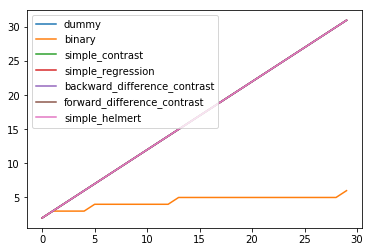

In [147]:
for index,encoding_result in enumerate(results):
    plt.plot(unique_categorical_count, encoding_result, label=encoding_options[index])
plt.legend()
plt.show()

In [13]:
df = [pd.DataFrame()]

In [14]:
isinstance(df, list)

True

In [19]:
from adegorical import adegorical as ad

In [29]:
categorical_data = ['yellow', 'red', 'yellow','red', 'magenta']
encoding_methods = ad.help()


pandas_series = np.array(categorical_data)
for encoding_method in encoding_methods:
        encoded_results_pandas = ad.get_categorical(pandas_series, encoding=encoding_method)
        print(isinstance(encoded_results_pandas, np.ndarray))

['dummy', 'binary', 'simple_contrast', 'simple_regression', 'backward_difference_contrast', 'forward_difference_contrast', 'simple_helmert']
True
True
True
True
True
True
0
[-1.0, -1.0]
[1, -1.0]
1
[0, -1]
[0, 1]
2
[1, -1]
True


In [23]:
encoded_results_pandas

,magenta_simple_helmert,yellow_simple_helmert
0,0,1.0
1,1,-1.0
2,0,1.0
3,1,-1.0
4,1,-1.0
